# Import necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# 1.0 Line Chart

### Preparation - Load a DataFrame

In [2]:
df = pd.read_csv('Car Sales.csv')
df

,Manufacturer,Model,Sales_in_thousands,__year_resale_value,Vehicle_type,Price_in_thousands,Engine_size,Horsepower,Wheelbase,Width,Length,Curb_weight,Fuel_capacity,Fuel_efficiency,Latest_Launch,Power_perf_factor
0,Acura,Integra,16.919,16.360,Passenger,21.50,1.8,140.0,101.2,67.3,172.4,2.639,13.2,28.0,2/2/2012,58.280150
1,Acura,TL,39.384,19.875,Passenger,28.40,3.2,225.0,108.1,70.3,192.9,3.517,17.2,25.0,6/3/2011,91.370778
2,Acura,CL,14.114,18.225,Passenger,NaN,3.2,225.0,106.9,70.6,192.0,3.470,17.2,26.0,1/4/2012,NaN
3,Acura,RL,8.588,29.725,Passenger,42.00,3.5,210.0,114.6,71.4,196.6,3.850,18.0,22.0,3/10/2011,91.389779
4,Audi,A4,20.397,22.255,Passenger,23.99,1.8,150.0,102.6,68.2,178.0,2.998,16.4,27.0,10/8/2011,62.777639
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152,Volvo,V40,3.545,NaN,Passenger,24.40,1.9,160.0,100.5,67.6,176.6,3.042,15.8,25.0,9/21/2011,66.498812
153,Volvo,S70,15.245,NaN,Passenger,27.50,2.4,168.0,104.9,69.3,185.9,3.208,17.9,25.0,11/24/2012,70.654495
154,Volvo,V70,17.531,NaN,Passenger,28.80,2.4,168.0,104.9,69.3,186.2,3.259,17.9,25.0,6/25/2011,71.155978
155,Volvo,C70,3.493,NaN,Passenger,45.50,2.3,236.0,104.9,71.5,185.7,3.601,18.5,23.0,4/26/2011,101.623357


## 1.1 Make a simple line chart by one array
We can use matplotlib.pyplot.plot() function to make a line chart.<br>
Note: Moving forward, we will refer "matplotlib.pyplot" as "plt".

We can simply input an array (e.g. a list, a numpy.array, a pandas.Series, etc.) to create one.<br>
This array will work as the y-axis and the x-axis will be automatically labelled from 0 onwards.

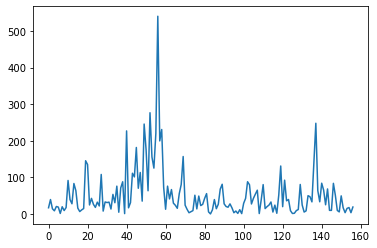

In [3]:
y = df['Sales_in_thousands']

plt.plot(y)
plt.show()

## 1.2 Make a simple line chart by 2 arrays
We can also input 2 arrays to plt.plot().<br>
In this case, the 1st input will be used as the x-axis and the 2nd input will be used as the y-axis.

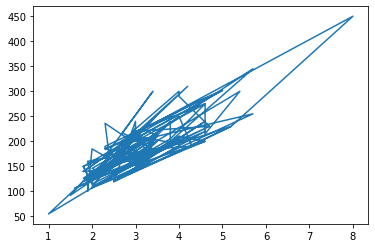

In [4]:
x = df['Engine_size']
y = df['Horsepower']

plt.plot(x, y)
plt.show()

We can observe a positive correlation between "Engine_size" and "Horsepower".<br>
But the chart is pretty messy.

We should sort the table using "Engine_size" (the x-axis) before we plot the line chart so the line does not jump around.<br>

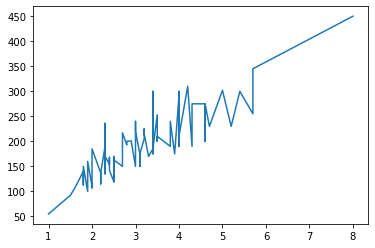

In [5]:
sub_df = df[['Engine_size', 'Horsepower']].sort_values(by='Engine_size')
x = sub_df['Engine_size']
y = sub_df['Horsepower']

plt.plot(x, y)
plt.show()

Now it looks much better.

We can set the 3rd input as '--' so the line becomes a dash.

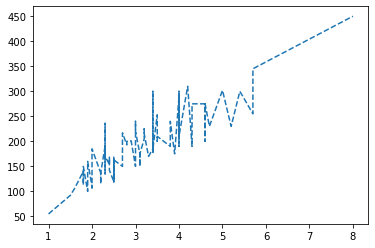

In [6]:
plt.plot(x, y, '--')
plt.show()

We can set marker='x' so the line will mark the data points by "x".

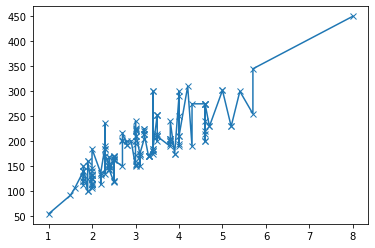

In [7]:
plt.plot(x, y, marker='x')
plt.show()

# 2.0 Scatter Plot
We can use plt.scatter() function to create a scatter plot.
We can just take it as a line chart without the line.

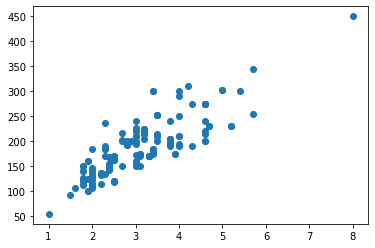

In [8]:
# Since there is no line, we do not need to sort the data
x = df['Engine_size']
y = df['Horsepower']

plt.scatter(x, y)
plt.show()

We can give an input to "s" argument to control the size of dots.

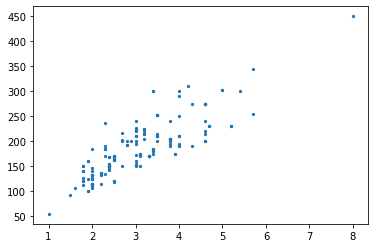

In [9]:
plt.scatter(x, y, s=5)
plt.show()

We can give an input to "color" argument to control the color of dots.<br>
The color array should have the same length as the "x" array and the "y" array.

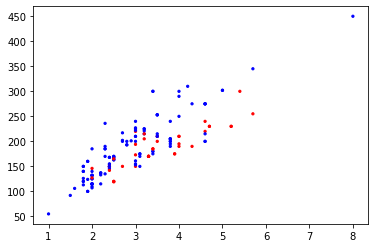

In [10]:
color = df['Vehicle_type'].map({'Passenger': 'blue', 'Car': 'red'})

plt.scatter(x, y, s=5, color=color)
plt.show()

In this case, the color is assigned to each data point.

There is an alternative way to create the same plot by splitting data into 2 groups and assign one single color to each group.

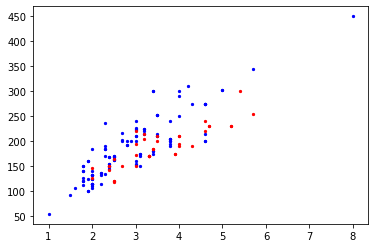

In [11]:
sub_df1 = df[df['Vehicle_type'] == 'Passenger']
x1 = sub_df1['Engine_size']
y1 = sub_df1['Horsepower']

sub_df2 = df[df['Vehicle_type'] == 'Car']
x2 = sub_df2['Engine_size']
y2 = sub_df2['Horsepower']

plt.scatter(x1, y1, s=5, color='blue')
plt.scatter(x2, y2, s=5, color='red')
plt.show()

# 3.0 Pie Chart

Before we make a pie chart, we can use Series.value_counts() method to determine the number of each unique value.

In [12]:
series = df['Manufacturer'].value_counts()
series

Dodge         11
Ford          11
Toyota         9
Chevrolet      9
Mercedes-B     9
Mitsubishi     7
Nissan         7
Chrysler       7
Volvo          6
Oldsmobile     6
Lexus          6
Mercury        6
Pontiac        6
Volkswagen     6
Saturn         5
Cadillac       5
Honda          5
Plymouth       4
Acura          4
Buick          4
Audi           3
Jeep           3
Porsche        3
Hyundai        3
BMW            3
Lincoln        3
Saab           2
Subaru         2
Jaguar         1
Infiniti       1
Name: Manufacturer, dtype: int64

Let's create a pie chart to see the porportion ot top 5 manufacturers.

We can use plt.pie() function to do that.<br>
It takes 2 inputs. The 1st one is the value of each pie, the 2nd one is the label.

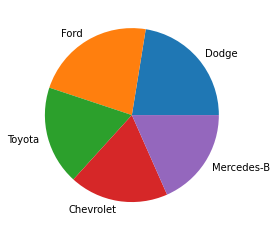

In [13]:
values = series.iloc[:5]
labels = series.iloc[:5].index

plt.pie(values, labels=labels)
plt.show()

# 4.0 Bar Chart

We can use plt.bar() function to create a bar chart.

It works simiarly to a pie chart. But the 2 inputs are swapped.<br>
The 1st one is label and the 2nd one is the value.

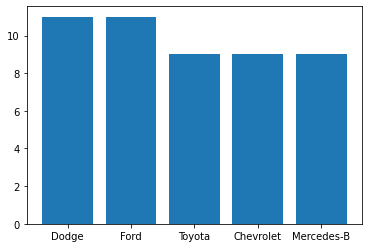

In [14]:
series = df['Manufacturer'].value_counts()
values = series.iloc[:5]
labels = series.iloc[:5].index

plt.bar(labels, values)
plt.show()

We can use plt.barh() function to create a horizontal bar chart. It works the same as plt.bar()

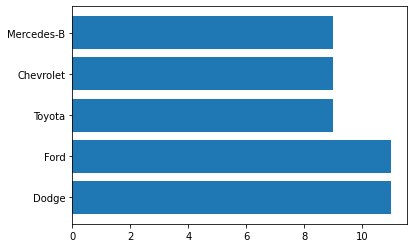

In [15]:
plt.barh(labels, values)
plt.show()

# 5.0 Histogram
We can use plt.hist() function to create a histogram.<br>
It takes 1 input of a numeric array. We can also set the number of bins.

(array([73., 35., 21.,  9.,  5.,  4.,  2.,  1.,  3.,  2.,  1.,  0.,  0.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.1000000e-01, 2.7132550e+01, 5.4155100e+01, 8.1177650e+01,
        1.0820020e+02, 1.3522275e+02, 1.6224530e+02, 1.8926785e+02,
        2.1629040e+02, 2.4331295e+02, 2.7033550e+02, 2.9735805e+02,
        3.2438060e+02, 3.5140315e+02, 3.7842570e+02, 4.0544825e+02,
        4.3247080e+02, 4.5949335e+02, 4.8651590e+02, 5.1353845e+02,
        5.4056100e+02]),
 <BarContainer object of 20 artists>)

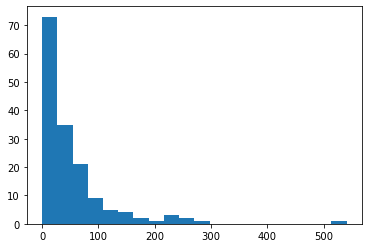

In [16]:
series = df['Sales_in_thousands']

plt.hist(series, bins=20)

# 6.0 Box Plot
We can use plt.boxplot() function to make a boxplot.<br>
It takes an array as the input.

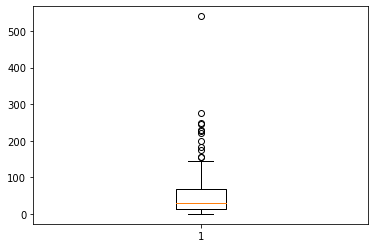

In [17]:
series = df['Sales_in_thousands']

plt.boxplot(series)
plt.show()

We can set vert=0 to make a horizontal boxplot.

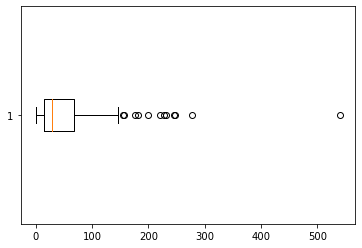

In [18]:
plt.boxplot(series, vert=0)
plt.show()

We can input a list of arrays.<br>
It will create multiple boxplots in parallel.

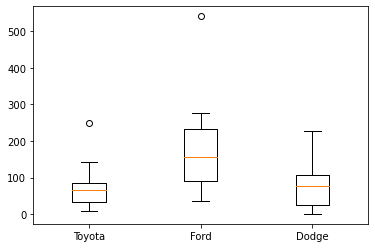

In [19]:
labels = ['Toyota', 'Ford', 'Dodge']
data = [df['Sales_in_thousands'][df['Manufacturer'] == label] for label in labels]

plt.boxplot(data, labels=labels)
plt.show()